In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE  # For imbalance


file_id = "1r5FVjwgmIc6rdbi2ocHH5BYSriIW0BnM"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head(10)

Dataset loaded successfully!
Shape: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [ ]:
df.describe(include=['object']).T


,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


In [ ]:
print(df.columns.tolist())

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Extract Revenue correlations separately for clarity
print("\n=== CORRELATIONS WITH REVENUE ===")
revenue_correlations = correlation_matrix['Revenue'].sort_values(ascending=False)
print(revenue_correlations)


=== CORRELATIONS WITH REVENUE ===
Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Month                      0.080150
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
VisitorType               -0.104726
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


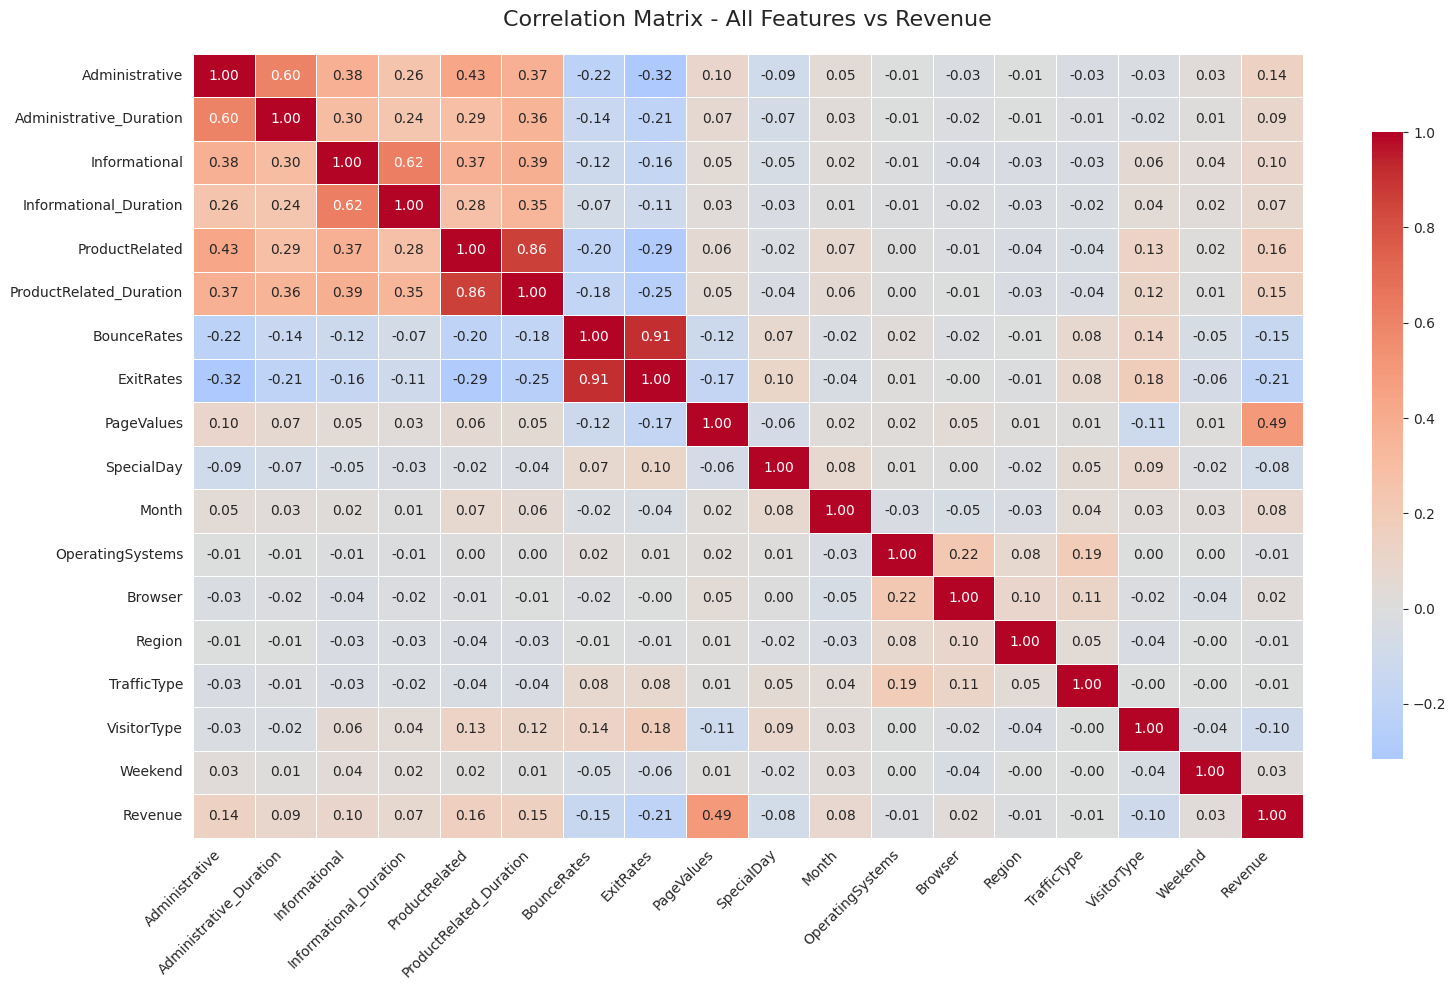

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert boolean columns to numeric for correlation
df_numeric = df.copy()
df_numeric['Revenue'] = df_numeric['Revenue'].astype(int)
df_numeric['Weekend'] = df_numeric['Weekend'].astype(int)

# Convert categorical columns if needed (Month, VisitorType)
if 'Month' in df_numeric.columns:
    df_numeric['Month'] = pd.Categorical(df_numeric['Month']).codes
if 'VisitorType' in df_numeric.columns:
    df_numeric['VisitorType'] = pd.Categorical(df_numeric['VisitorType']).codes

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix - All Features vs Revenue', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Drop columns with near-zero correlation to Revenue
df = df.drop(columns=['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend'])
print(f"New shape after dropping: {df.shape}")
print(f"\nRemaining columns: {list(df.columns)}")

New shape after dropping: (12330, 13)

Remaining columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'VisitorType', 'Revenue']


In [ ]:
df.head(10)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,Returning_Visitor,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,Returning_Visitor,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,Returning_Visitor,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,Returning_Visitor,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,Returning_Visitor,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,Returning_Visitor,False


In [ ]:
print(df['Revenue'].value_counts(normalize=True))
df.shape

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64


(12330, 13)

In [ ]:
print("Missing values:", df.isnull().sum())

Missing values: Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
VisitorType                0
Revenue                    0
dtype: int64


In [ ]:
print("duplicated values:", df.duplicated().sum())

duplicated values: 636


In [ ]:
df.drop_duplicates(inplace=True)
print("duplicated values:", df.duplicated().sum())

duplicated values: 0


In [ ]:
df.shape

(11694, 13)

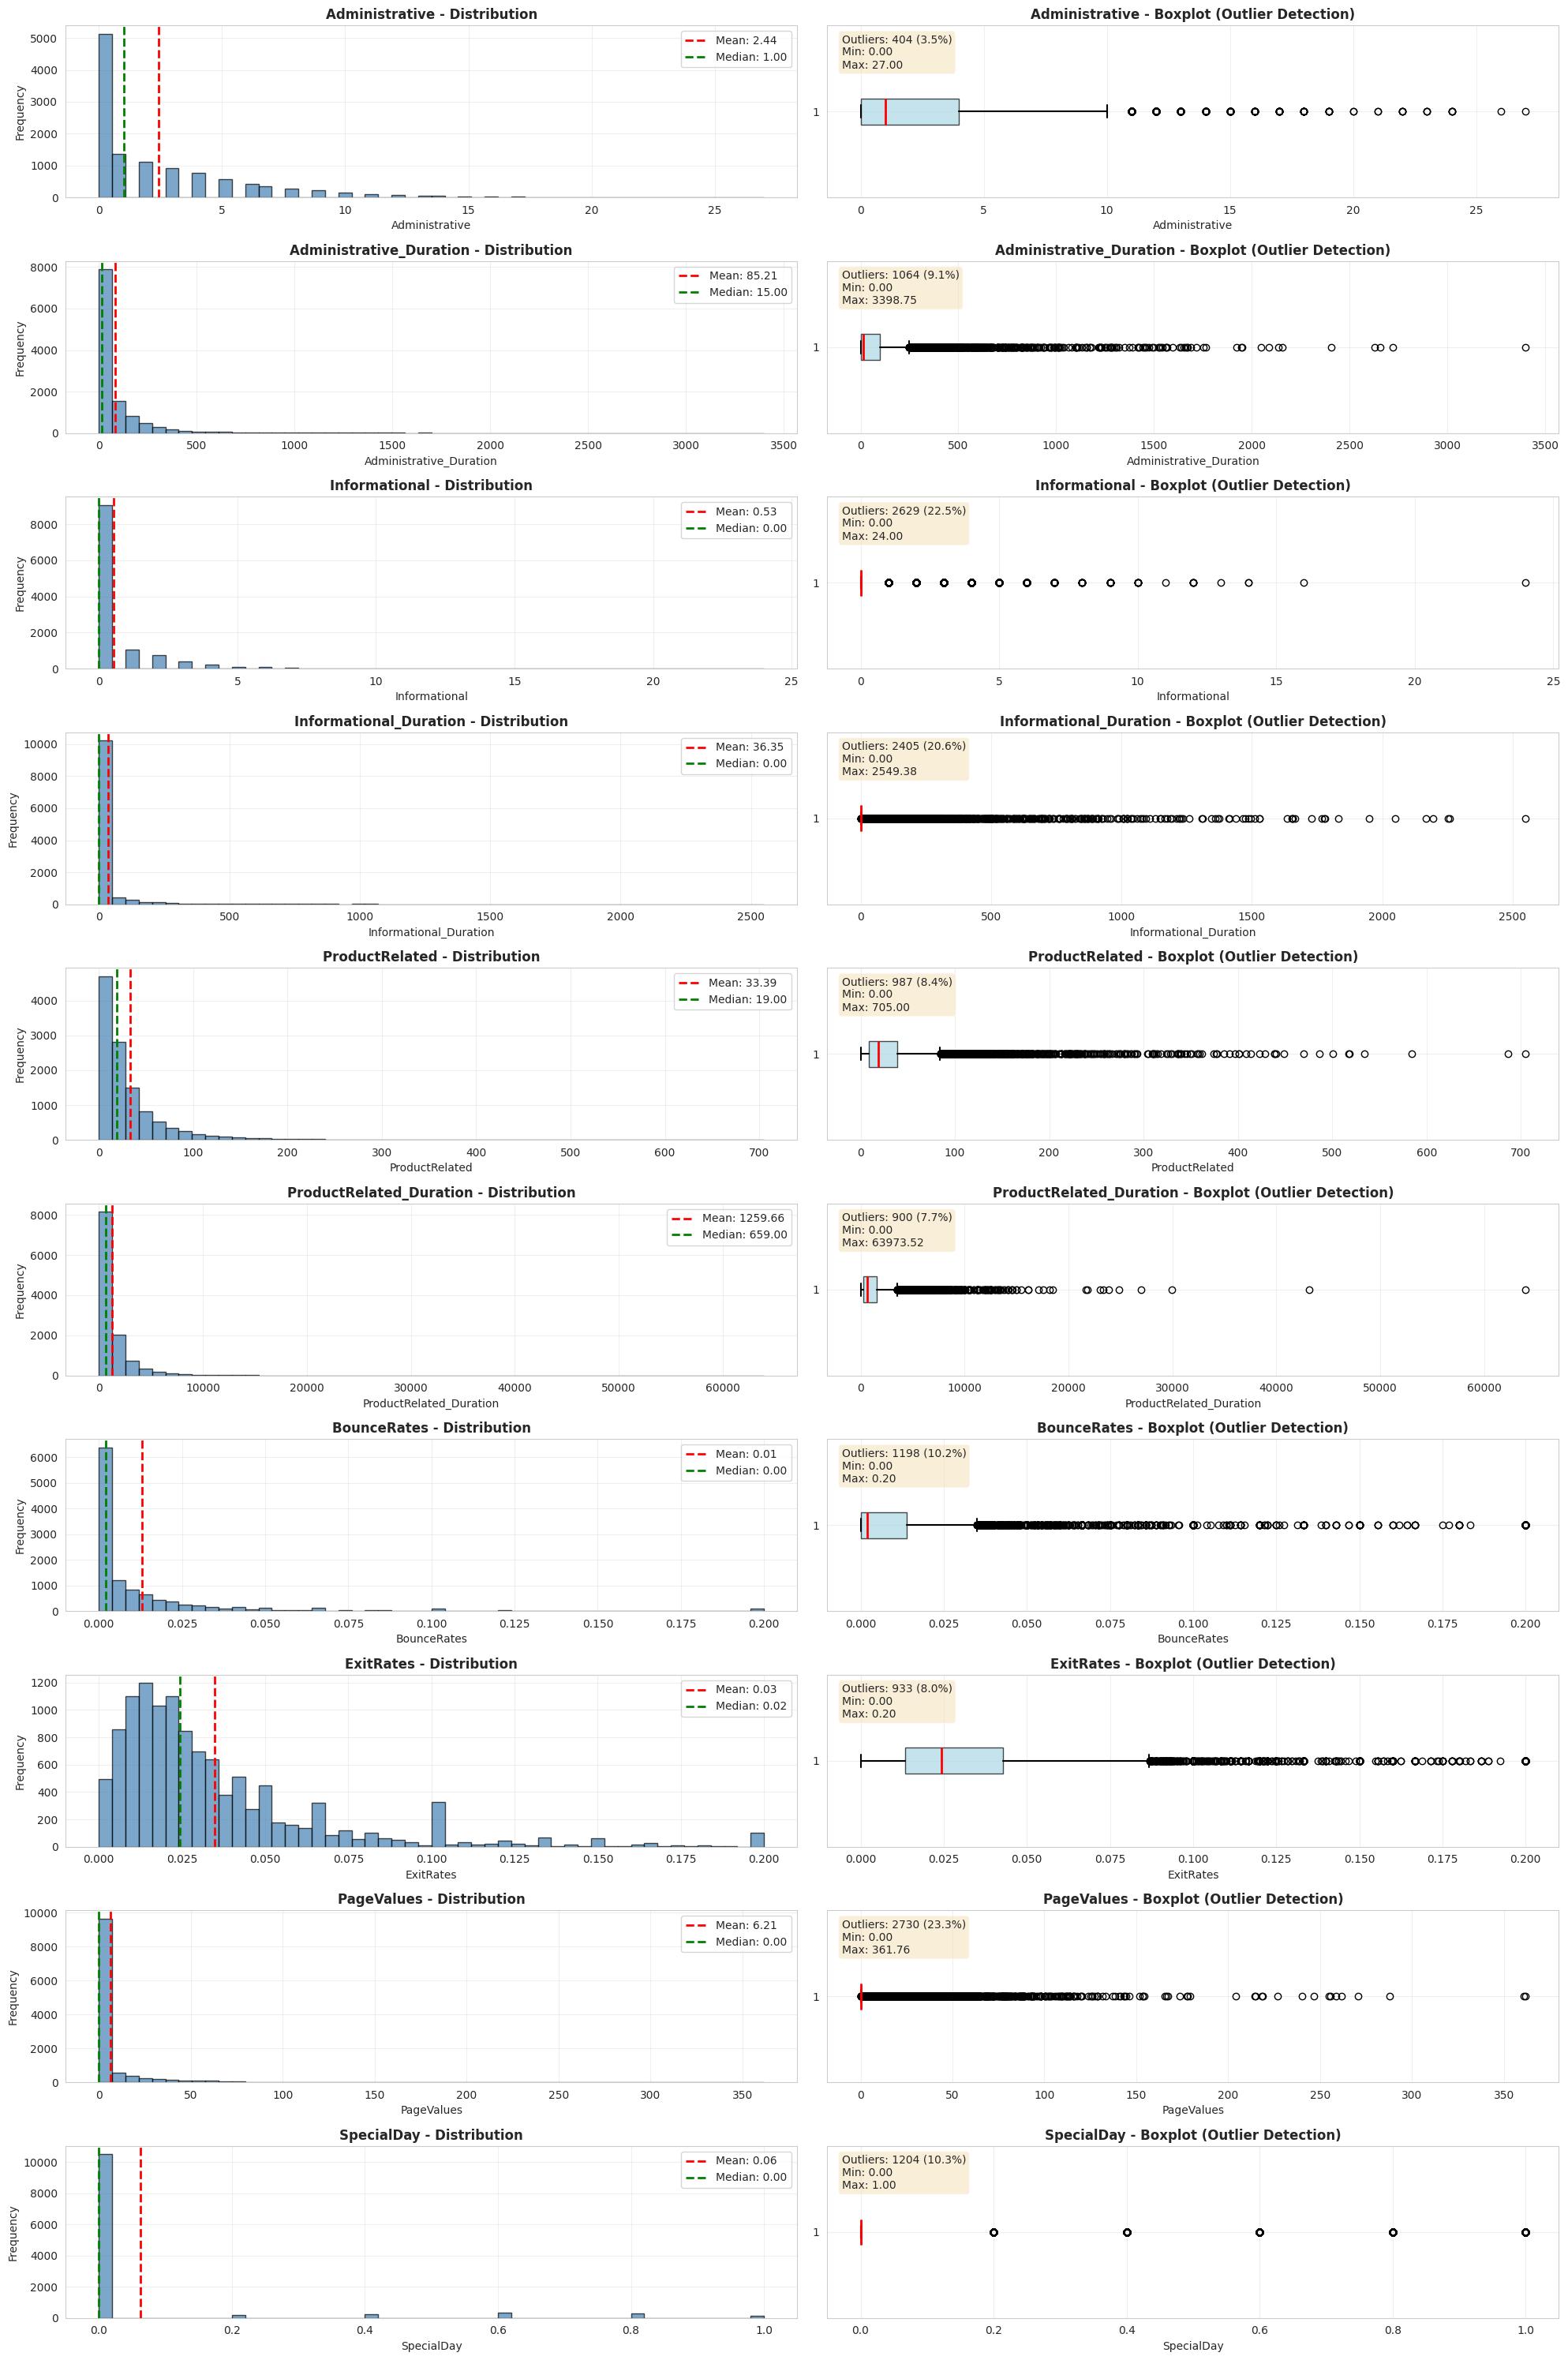

OUTLIER SUMMARY

Administrative:
  Range: [0.00, 27.00]
  IQR Bounds: [-6.00, 10.00]
  Outliers: 404 (3.45%)
  Outlier Range: [11.00, 27.00]

Administrative_Duration:
  Range: [0.00, 3398.75]
  IQR Bounds: [-149.00, 248.33]
  Outliers: 1064 (9.10%)
  Outlier Range: [248.50, 3398.75]

Informational:
  Range: [0.00, 24.00]
  IQR Bounds: [0.00, 0.00]
  Outliers: 2629 (22.48%)
  Outlier Range: [1.00, 24.00]

Informational_Duration:
  Range: [0.00, 2549.38]
  IQR Bounds: [0.00, 0.00]
  Outliers: 2405 (20.57%)
  Outlier Range: [1.00, 2549.38]

ProductRelated:
  Range: [0.00, 705.00]
  IQR Bounds: [-36.00, 84.00]
  Outliers: 987 (8.44%)
  Outlier Range: [85.00, 705.00]

ProductRelated_Duration:
  Range: [0.00, 63973.52]
  IQR Bounds: [-1739.26, 3514.88]
  Outliers: 900 (7.70%)
  Outlier Range: [3517.04, 63973.52]

BounceRates:
  Range: [0.00, 0.20]
  IQR Bounds: [-0.02, 0.03]
  Outliers: 1198 (10.24%)
  Outlier Range: [0.03, 0.20]

ExitRates:
  Range: [0.00, 0.20]
  IQR Bounds: [-0.03, 0.09]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 16)

# Define numerical columns to visualize
numerical_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates',
    'PageValues', 'SpecialDay'
]

# Create subplots: 2 columns (histogram + boxplot) for each feature
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(20, len(numerical_cols)*3))

for idx, col in enumerate(numerical_cols):
    # Histogram
    axes[idx, 0].hist(df[col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx, 0].set_title(f'{col} - Distribution', fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].grid(True, alpha=0.3)

    # Add statistics text
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    axes[idx, 0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx, 0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx, 0].legend()

    # Boxplot
    bp = axes[idx, 1].boxplot(df[col], vert=False, patch_artist=True,
                               boxprops=dict(facecolor='lightblue', alpha=0.7),
                               medianprops=dict(color='red', linewidth=2),
                               whiskerprops=dict(linewidth=1.5),
                               capprops=dict(linewidth=1.5))
    axes[idx, 1].set_title(f'{col} - Boxplot (Outlier Detection)', fontsize=12, fontweight='bold')
    axes[idx, 1].set_xlabel(col)
    axes[idx, 1].grid(True, alpha=0.3)

    # Calculate and display outlier info
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100

    axes[idx, 1].text(0.02, 0.95, f'Outliers: {len(outliers)} ({outlier_pct:.1f}%)\nMin: {df[col].min():.2f}\nMax: {df[col].max():.2f}',
                     transform=axes[idx, 1].transAxes, fontsize=10,
                     verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=" * 80)
print("OUTLIER SUMMARY")
print("=" * 80)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\n{col}:")
    print(f"  Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
    print(f"  IQR Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  Outlier Range: [{outliers[col].min():.2f}, {outliers[col].max():.2f}]")

In [ ]:
print(f"Shape: {df.shape}")
dff = df.groupby(["VisitorType"], dropna=False).size().reset_index(name = "No_of_data")
dff

Shape: (11694, 13)


,VisitorType,No_of_data
0,New_Visitor,1675
1,Other,71
2,Returning_Visitor,9948


In [ ]:
df.drop(df[df['VisitorType'] == 'Other'].index, inplace=True)
dff = df.groupby(["VisitorType"], dropna=False).size().reset_index(name = "No_of_data")
print(f"Shape: {df.shape}")

Shape: (11623, 13)


In [ ]:
from sklearn.preprocessing import LabelEncoder

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['Month'] = df['Month'].map(month_mapping)

le_visitor = LabelEncoder()
df['VisitorType'] = le_visitor.fit_transform(df['VisitorType'])

le_revenue = LabelEncoder()
df['Revenue'] = le_revenue.fit_transform(df['Revenue'])


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,1,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,1,0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report, roc_curve)

# Set random seed for reproducibility
np.random.seed(42)

print("BINARY CLASSIFICATION: REVENUE PREDICTION")


#  PREPARE DATA

print("\n STEP 1: Data Preparation")

X = df.drop('Revenue', axis=1)
y = df['Revenue']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"Class balance: {y.value_counts(normalize=True).round(3).to_dict()}")

#  TRAIN/TEST SPLIT

print("\n STEP 2: Train/Test Split (80/20)")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f" Training set: {X_train.shape[0]} samples")
print(f" Test set: {X_test.shape[0]} samples")
print(f" Stratified split maintained class distribution")

# PREPARE DATA FOR EACH MODEL

print("\n STEP 3: Model-Specific Data Preparation")
print("-"*80)

# Random Forest - Use original data (no scaling needed)
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
print(" Random Forest: Using original features (no scaling)")

# Logistic Regression - Scale features
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train)
X_test_lr = scaler.transform(X_test)
print(" Logistic Regression: Features scaled (StandardScaler)")



BINARY CLASSIFICATION: REVENUE PREDICTION

 STEP 1: Data Preparation
Features shape: (11623, 12)
Target shape: (11623,)

Target distribution:
Revenue
0    9731
1    1892
Name: count, dtype: int64
Class balance: {0: 0.837, 1: 0.163}

 STEP 2: Train/Test Split (80/20)
 Training set: 9298 samples
 Test set: 2325 samples
 Stratified split maintained class distribution

 STEP 3: Model-Specific Data Preparation
--------------------------------------------------------------------------------
 Random Forest: Using original features (no scaling)
 Logistic Regression: Features scaled (StandardScaler)


In [ ]:
#  TRAIN LOGISTIC REGRESSION
print(" MODEL 1: LOGISTIC REGRESSION")

lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train_lr, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_lr)
y_pred_proba_lr = lr_model.predict_proba(X_test_lr)[:, 1]

# Metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_proba_lr)

print("\n Logistic Regression Results:")
print("-"*80)
print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print(f"ROC-AUC:   {lr_auc:.4f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Purchase', 'Purchase']))



 MODEL 1: LOGISTIC REGRESSION

 Logistic Regression Results:
--------------------------------------------------------------------------------
Accuracy:  0.8632
Precision: 0.5612
Recall:    0.7275
F1-Score:  0.6336
ROC-AUC:   0.8900

 Classification Report:
              precision    recall  f1-score   support

 No Purchase       0.94      0.89      0.92      1947
    Purchase       0.56      0.73      0.63       378

    accuracy                           0.86      2325
   macro avg       0.75      0.81      0.77      2325
weighted avg       0.88      0.86      0.87      2325



In [ ]:
#  TRAIN RANDOM FOREST

print(" MODEL 2: RANDOM FOREST")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train_rf, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_rf)
y_pred_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]

# Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("\n Random Forest Results:")
print("-"*80)
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"ROC-AUC:   {rf_auc:.4f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Purchase', 'Purchase']))



 MODEL 2: RANDOM FOREST

 Random Forest Results:
--------------------------------------------------------------------------------
Accuracy:  0.8735
Precision: 0.5894
Recall:    0.7328
F1-Score:  0.6533
ROC-AUC:   0.9145

 Classification Report:
              precision    recall  f1-score   support

 No Purchase       0.95      0.90      0.92      1947
    Purchase       0.59      0.73      0.65       378

    accuracy                           0.87      2325
   macro avg       0.77      0.82      0.79      2325
weighted avg       0.89      0.87      0.88      2325



In [ ]:
#  MODEL COMPARISON
print(" MODEL COMPARISON")

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Logistic Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1, lr_auc],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc]
})

print("\n", comparison_df.to_string(index=False))

# Determine winner
if rf_f1 > lr_f1:
    print(f"\n Winner: Random Forest (F1-Score: {rf_f1:.4f})")
else:
    print(f"\n Winner: Logistic Regression (F1-Score: {lr_f1:.4f})")


#  FEATURE IMPORTANCE (Random Forest)
print(" TOP 10 MOST IMPORTANT FEATURES (Random Forest)")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n", feature_importance.head(10).to_string(index=False))


 MODEL COMPARISON

    Metric  Logistic Regression  Random Forest
 Accuracy             0.863226       0.873548
Precision             0.561224       0.589362
   Recall             0.727513       0.732804
 F1-Score             0.633641       0.653302
  ROC-AUC             0.890026       0.914458

 Winner: Random Forest (F1-Score: 0.6533)
 TOP 10 MOST IMPORTANT FEATURES (Random Forest)

                 Feature  Importance
             PageValues    0.508362
ProductRelated_Duration    0.096326
              ExitRates    0.090756
                  Month    0.070970
         ProductRelated    0.061639
            BounceRates    0.050967
Administrative_Duration    0.044239
         Administrative    0.032887
 Informational_Duration    0.018736
          Informational    0.010502


  VISUALIZATIONS


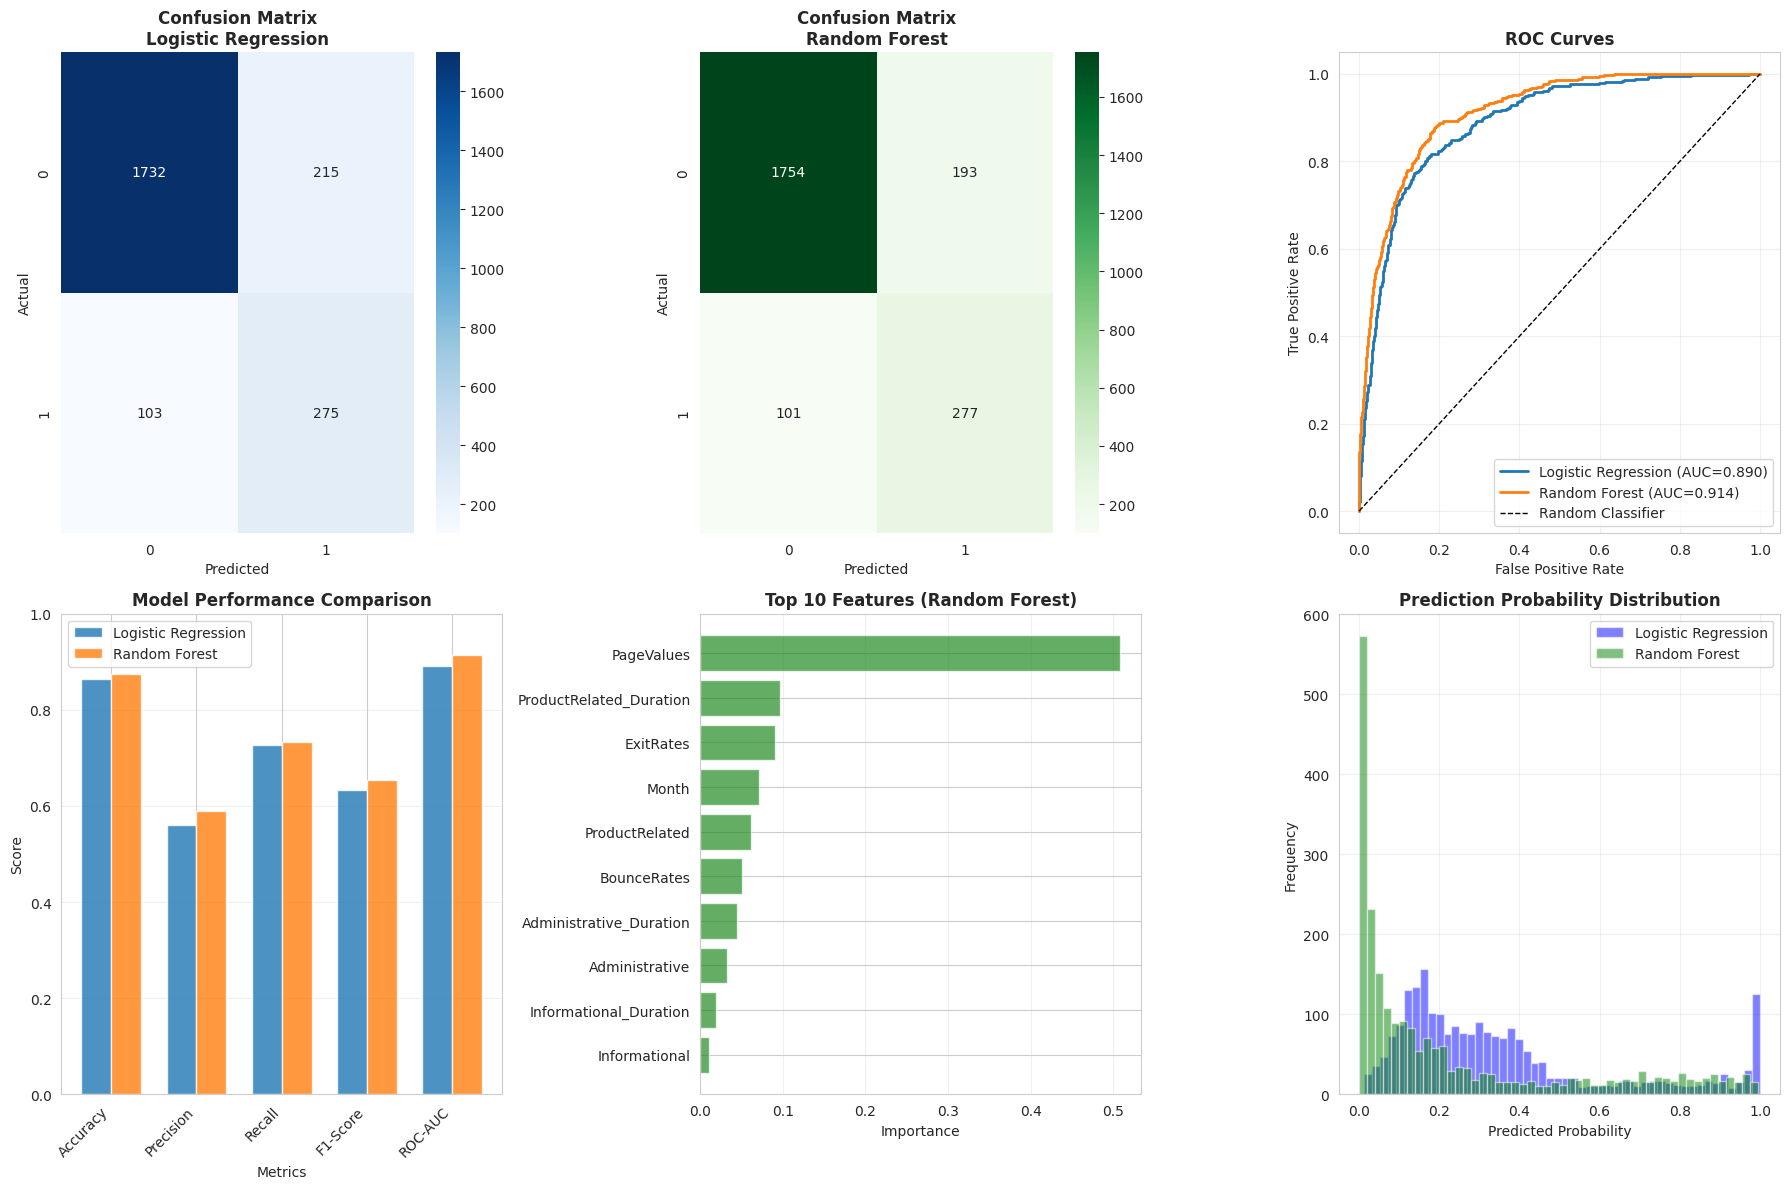

 Visualizations saved as 'model_evaluation_results.png'
CROSS-VALIDATION (5-Fold)
 Logistic Regression CV F1-Scores: [0.6515 0.6456 0.6306 0.6491 0.6276]
   Mean: 0.6409 (+/- 0.0197)
 Random Forest CV F1-Scores: [0.6949 0.6799 0.6809 0.7066 0.683 ]
   Mean: 0.6891 (+/- 0.0206)


In [ ]:
#  VISUALIZATIONS

print("  VISUALIZATIONS")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix\nLogistic Regression', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 2. Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix\nRandom Forest', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

axes[0, 2].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={lr_auc:.3f})', linewidth=2)
axes[0, 2].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={rf_auc:.3f})', linewidth=2)
axes[0, 2].plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
axes[0, 2].set_xlabel('False Positive Rate')
axes[0, 2].set_ylabel('True Positive Rate')
axes[0, 2].set_title('ROC Curves', fontsize=12, fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1, lr_auc]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc]

x = np.arange(len(metrics))
width = 0.35

axes[1, 0].bar(x - width/2, lr_scores, width, label='Logistic Regression', alpha=0.8)
axes[1, 0].bar(x + width/2, rf_scores, width, label='Random Forest', alpha=0.8)
axes[1, 0].set_xlabel('Metrics')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Model Performance Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(metrics, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].set_ylim([0, 1])
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Feature Importance (Top 10)
top_features = feature_importance.head(10)
axes[1, 1].barh(range(len(top_features)), top_features['Importance'], color='forestgreen', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_features)))
axes[1, 1].set_yticklabels(top_features['Feature'])
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Top 10 Features (Random Forest)', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3, axis='x')

# 6. Prediction Distribution
axes[1, 2].hist(y_pred_proba_lr, bins=50, alpha=0.5, label='Logistic Regression', color='blue')
axes[1, 2].hist(y_pred_proba_rf, bins=50, alpha=0.5, label='Random Forest', color='green')
axes[1, 2].set_xlabel('Predicted Probability')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_evaluation_results.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Visualizations saved as 'model_evaluation_results.png'")


#  CROSS-VALIDATION
print("CROSS-VALIDATION (5-Fold)")

cv_scores_lr = cross_val_score(lr_model, X_train_lr, y_train, cv=5, scoring='f1')
print(f" Logistic Regression CV F1-Scores: {cv_scores_lr.round(4)}")
print(f"   Mean: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")

cv_scores_rf = cross_val_score(rf_model, X_train_rf, y_train, cv=5, scoring='f1')
print(f" Random Forest CV F1-Scores: {cv_scores_rf.round(4)}")
print(f"   Mean: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")




In [ ]:
# FINAL SUMMARY
print(" FINAL SUMMARY")
print("\n Both models trained and evaluated successfully!")
print(f" Dataset: {len(X)} samples, {X.shape[1]} features")
print(f" Test set: {len(X_test)} samples")
print(f"\n Best Model: {'Random Forest' if rf_f1 > lr_f1 else 'Logistic Regression'}")
print(f"   F1-Score: {max(rf_f1, lr_f1):.4f}")
print(f"   ROC-AUC: {max(rf_auc, lr_auc):.4f}")
print("\n Key Insights:")
print(f"   - Top feature: {feature_importance.iloc[0]['Feature']}")
print(f"   - Feature importance: {feature_importance.iloc[0]['Importance']:.4f}")


 FINAL SUMMARY

 Both models trained and evaluated successfully!
 Dataset: 11623 samples, 12 features
 Test set: 2325 samples

 Best Model: Random Forest
   F1-Score: 0.6533
   ROC-AUC: 0.9145

 Key Insights:
   - Top feature: PageValues
   - Feature importance: 0.5084
